# Исследование рекламной кампании приложения Procrastinate Pro+

**Описание проекта:** Предстоит изучение рекламной кампании развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель проекта:** Разобраться в причинах убытков в рекламной кампании, подготовить предложения по выходу рекламной кампании в плюс.

**План исследования:** Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.
<br>
1) Проведем предобработку данных, подготовим данные к анализу;
<br>

2) Проведем исследовательский анализ данных, узнаем, откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов; 
<br>

3) Выясним сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.

## Предобработка данных

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

Проведем предобработку данных, загрузим данные о визитах, заказах и расходах в переменные, изучим каждый датафрейм по отдельности, проверим корректность выгрузки, пропуски, дубликаты итд.

### Датафрейм visits_info_short

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет. Необходимо привести названия столбцов к нижнему регистру, содержимое столбцов 'Session Start' и 'Session End' перевести в формат даты. Также приведем к нижнему регистру содержимое столбцов 'Region', 'Device',	'Channel'.

In [4]:
# Переименовываем столбцы
visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 'Channel': 'channel', 
                       'Session Start': 'session_start', 'Session End': 'session_end'}, inplace=True)

In [5]:
# Приводим данные в таблице к нижнему регистру
for elem in visits.columns[1:4]:
    visits[elem] = visits[elem].str.lower()

In [6]:
# Переводим в формат даты
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Теперь проверим содержимое столбцов на неявные дубликаты, ошибки и прочее.

In [7]:
visits.region.value_counts()

united states    207327
uk                36419
france            35396
germany           30759
Name: region, dtype: int64

In [8]:
visits.device.value_counts()

iphone     112603
android     72590
pc          62686
mac         62022
Name: device, dtype: int64

In [9]:
visits.channel.value_counts()

organic               107760
tiptop                 54794
faceboom               49022
wahoonetbanner         20465
leapbob                17013
opplecreativemedia     16794
rocketsuperads         12724
yrabbit                 9053
mediatornado            8878
adnonsense              6891
lambdamediaads          6507
Name: channel, dtype: int64

Каких-либо проблем не обнаружено.

Проверим на наличие дубликатов.

In [10]:
visits.duplicated().sum()

0

### Датафрейм orders_info_short

In [11]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Здесь тоже изменим названия столбцов и изменим формат в столбце 'event_dt'.

In [13]:
orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'}, inplace=True)

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [15]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Данные выглядят корректно.

Проверим на наличие дубликатов.

In [16]:
orders.duplicated().sum()

0

### Датафрейм costs_info_short

In [17]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Здесь изменим наименования столбцов, изменим формат столбца dt и проверим на наличие дубликатов.

In [19]:
costs.columns = costs.columns.str.lower()

In [20]:
costs['channel'] = costs['channel'].str.lower()

In [21]:
costs.duplicated().sum()

0

Данные готовы к анализу.

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Определим временные рамки, в которых нам дана информация о пользователях.

In [22]:
display(visits['session_start'].min())
visits['session_start'].max()

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

Данные даны с начала мая 2019 по конец октября 2019г., то есть за 6 месяцев.

Создадим таблицу с профилями пользователей. Из таблицы 'visits' выберем только запись о первом посещении сервиса пользователем. Так мы оставим только уникальных пользователей.При этом исключим из анализа пользователей, которые пришли по рекомендациям. Таковых довольно много и они будут влиять на показатели.

In [23]:
profiles = visits.sort_values(by=['user_id', 'session_start']).groupby('user_id')\
.agg({'session_start': 'first', 'region': 'first', 'device': 'first', 'channel': 'first'})\
.rename(columns={'session_start': 'first_ts'}).reset_index()

# Оставляем только тех пользователей, которые пришли не по рекомендации
profiles = profiles.query('channel != "organic"')

Добавим в таблицу данные о том, платил ли пользователь хотя бы один раз за использование сервиса.

In [24]:
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

In [25]:
def get_users(profile, value):
    # Сгруппируем данные по стране и посчитаем количество платящих пользователей.
    payers = profiles[profiles['payer']].groupby(value).agg({'user_id': 'count'})\
    .rename(columns={'user_id': 'payer'}).reset_index()
    
    # И их общее количество
    total_clients = profiles.groupby(value).agg({'user_id': 'count'})\
    .rename(columns={'user_id': 'total_clients'}).reset_index()
    
    # Теперь объединим данные в одну таблицу и найдем долю платящих пользователей.
    df = pd.merge(total_clients, payers, on=value, how='left')
    df['ratio'] = (df['payer'] / df['total_clients']).round(3)
    
    return df.sort_values(by='ratio', ascending=False)

Выясним, из какой страны больше платящих пользователей, и какую долю платящие пользователи занимают в общем количестве пользователей для каждой страны.

In [26]:
get_users(profiles, 'region')

,region,total_clients,payer,ratio
3,united states,61829,6108,0.099
1,germany,9528,490,0.051
2,uk,11154,569,0.051
0,france,11058,554,0.050


**Вывод:** В лидерах США. И по соотношению платящих пользователей тоже. В аутсайдерах Франция, показатель почти в два раза ниже, чем в США.

Теперь изучим долю платящих пользователей в зависимости от устройства, которым они пользуются.

In [27]:
get_users(profiles, 'device')

,device,total_clients,payer,ratio
2,mac,18693,1673,0.089
1,iphone,33882,2972,0.088
0,android,21841,1782,0.082
3,pc,19153,1294,0.068


**Вывод:** Больше всего платящих пользователей у пользователей mac и iphone. Соотношение платящих пользователей к общему числу у пользователей всех устройств примерно одинаковое, чуть хуже дела обстоят с пользователями персональных компьютеров.

Изучим, из каких источников приходят самые платящие пользователи.

In [28]:
get_users(profiles, 'channel')

,channel,total_clients,payer,ratio
1,faceboom,29144,3557,0.122
0,adnonsense,3880,440,0.113
2,lambdamediaads,2149,225,0.105
7,tiptop,19561,1878,0.096
6,rocketsuperads,4448,352,0.079
8,wahoonetbanner,8553,453,0.053
9,yrabbit,4312,165,0.038
4,mediatornado,4364,156,0.036
3,leapbob,8553,262,0.031
5,opplecreativemedia,8605,233,0.027


**Вывод:** Лучший источник трафика по этому показателю это faceboom, худший - opplecreativemedia.

**Общий вывод по разделу:** 
1) В США больше всего платящих пользователей, остальные регионы отстают по этому показателю и примерно равны между собой.
<br>

2) Меньше всего платящих пользователей пользуются компьютерами. У других устройств соотношение примерно одинаковое.
<br>

3) Наиболее привлекательным каналом с точки зрения соотношения платящих пользователей является faceboom, неплохо себя показывают adnonsense и lambdamediaads, хуже всего - opplecreativemedia

## Общая оценка маркетинговой стратегии

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника

### Общие затраты на рекламу

Для начала вычислим общую сумму затраченных средств.

In [29]:
costs['costs'].sum()

105497.30000000002

Всего на рекламную кампанию потратили почти 105,5 млн. руб.

Создадим сводную таблицу и посмотрим на распределение бюджета по каналам привлечения.

In [30]:
channel_total_costs = costs.pivot_table(index='channel', values='costs', aggfunc='sum')\
.sort_values(by='costs', ascending=False).reset_index()

channel_total_costs

,channel,costs
0,tiptop,54751.30
1,faceboom,32445.60
2,wahoonetbanner,5151.00
3,adnonsense,3911.25
4,opplecreativemedia,2151.25
5,rocketsuperads,1833.00
6,leapbob,1797.60
7,lambdamediaads,1557.60
8,mediatornado,954.48
9,yrabbit,944.22


Визуализируем эту таблицу.

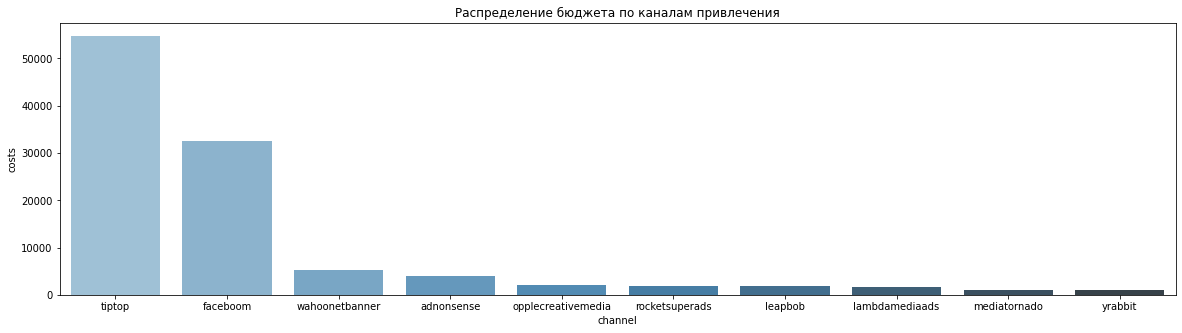

In [31]:
fig = plt.subplots(figsize=(20, 5))
sns.barplot(x="channel", y="costs", data=channel_total_costs, palette="Blues_d").set_title('Распределение бюджета по каналам привлечения');

**Вывод:** С заметным опережением лидируют каналы titop и faceboom. При этом помним, что соотношение платящих пользователей к общему количеству пользователей, привлеченных по  каналу titop не самое высокое, а на канал lambdamediaads тратится очень небольшой бюджет, учитывая, что это соотношение у него в числе лидеров.

Рассчитаем распределение рекламного бюджета во времени и для наглядности построим график. 

In [32]:
costs_by_time = costs.pivot_table(index='dt', values='costs', aggfunc='sum').reset_index()

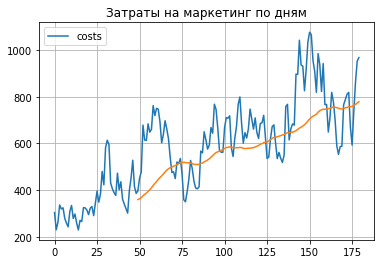

In [33]:
ax = costs_by_time.plot(grid=True, title='Затраты на маркетинг по дням')
costs_by_time.rolling(window=50).mean().plot(grid=True, ax=ax, legend=False)
plt.show();

**Вывод:** Наблюдается тенденция к увеличению рекламного бюджета. Бюджет за полгода вырос примерно в 4 раза.

### Рекламный бюджет по каналам привлечения

Теперь исследуем, как распределялся рекламный бюджет по дням для каждого рекламного канала.

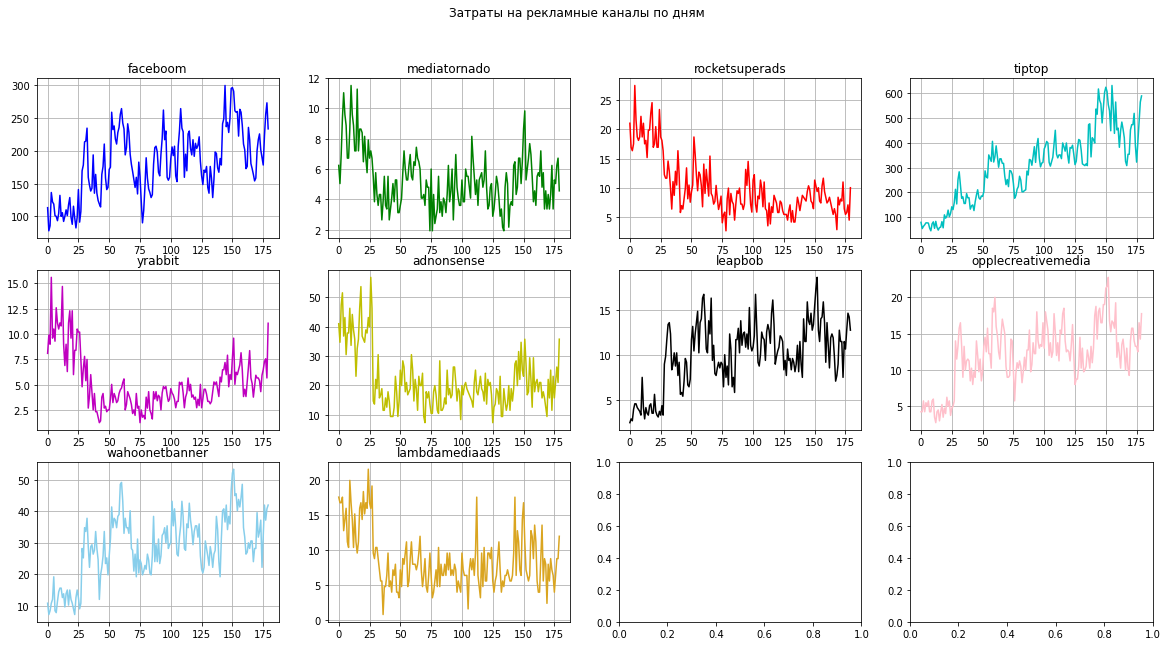

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axe = axes.ravel()

# Cтроим сводную таблицу
costs_by_day = costs.pivot_table(index='channel', columns='dt', values='costs', aggfunc='sum').reset_index()
my_list = costs['channel'].unique()
colors = ['b','g','r','c','m','y','k','pink', 'skyblue', 'goldenrod']

# Cтроим графики в цикле
for i in range(len(my_list)):
    costs_by_day[costs_by_day['channel'] == my_list[i]].T[1:].reset_index()\
    .plot(grid=True, title='Затраты на маркетинг по дням', color=colors[i], ax=axe[i], legend=False)
    axe[i].set_title(my_list[i])

fig.suptitle('Затраты на рекламные каналы по дням');

Отмечаем, что расходы на канал tiptop всё время увеличиваются. Но выводы делать пока рано, надо понять, окупается ли реклама на данном канале.

Оценим, сколько в среднем стоило привлечение одного покупателя из каждого источника. Для этого поделим сумму, затраченную на канал привлечения на общее количество пользователей, пришедших с этого канала за всё время. 

In [35]:
channel = get_users(profiles, 'channel')
customer_cost = channel[['channel', 'payer']].merge(channel_total_costs, on='channel', how='left')
customer_cost['customer_cost'] = customer_cost['costs'] / customer_cost['payer']
customer_cost.sort_values(by='customer_cost', ascending=False)

,channel,payer,costs,customer_cost
3,tiptop,1878,54751.30,29.154047
5,wahoonetbanner,453,5151.00,11.370861
9,opplecreativemedia,233,2151.25,9.232833
0,faceboom,3557,32445.60,9.121619
1,adnonsense,440,3911.25,8.889205
2,lambdamediaads,225,1557.60,6.922667
8,leapbob,262,1797.60,6.861069
7,mediatornado,156,954.48,6.118462
6,yrabbit,165,944.22,5.722545
4,rocketsuperads,352,1833.00,5.207386


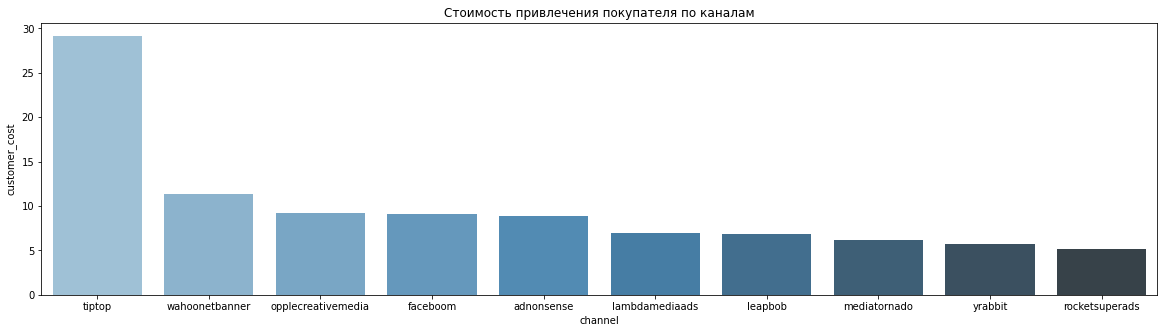

In [36]:
fig = plt.subplots(figsize=(20, 5))
sns.barplot(x="channel", y="customer_cost", data=customer_cost.sort_values(by='customer_cost', ascending=False), palette="Blues_d" )\
.set_title('Стоимость привлечения покупателя по каналам');

Снова бросается в глаза стоимость одного клиента для канала tiptop. Бюджет на этот канал постоянно растет, при этом стоимость клиента по нему самая высокая.

**Общий вывод по разделу:** Рекламный бюджет сильно вырос за полгода. Больше всего рекламный бюджет компания расходует на каналы tiptop и faceboom. Если по faceboom соотношение платящих пользователей это оправдывает, то по tiptop постоянный рост расходов вызывает сомнения. Нужно понять, окупаются ли эти вложения.

## Оценка окупаемости рекламной кампании

С помощью LTV и ROI проанализируем:
- общую окупаемость рекламы;
- окупаемость рекламы с разбивкой по устройствам;
- окупаемость рекламы с разбивкой по странам;
- окупаемость рекламы с разбивкой по рекламным каналам.

Зададим горизонт и момент анализа. Окупаемость рекламы должна наступать в течение 14 дней.

In [37]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Создадим профили пользователей.

In [38]:
# находим параметры первых посещений
profiles = visits.sort_values(by=['user_id', 'session_start']).groupby('user_id')\
.agg({'session_start': 'first', 'region': 'first', 'device': 'first', 'channel': 'first'})\
.rename(columns={'session_start': 'first_ts'}).reset_index()

# для когортного анализа определяем дату первого посещения
# и первый день месяца, в который это посещение произошло
profiles['dt'] = pd.to_datetime(profiles['first_ts'])
profiles['dt'] = profiles['first_ts'].dt.date
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# добавляем признак платящих пользователей
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

# считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'})\
.rename(columns={'user_id': 'unique_users'}).reset_index()
new_users['dt'] = pd.to_datetime(new_users['dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

# объединяем траты на рекламу и число привлечённых пользователей
ad_costs = new_users.merge(costs, on=['dt', 'channel'], how='left')

# делим рекламные расходы на число привлечённых пользователей
ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# добавляем стоимость привлечения в профили
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')

# стоимость привлечения органических пользователей равна нулю
profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

profiles.head()

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,united states,mac,faceboom,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,united states,iphone,faceboom,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,france,iphone,organic,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,germany,pc,adnonsense,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,united states,iphone,yrabbit,2019-10-02,2019-10-01,False,0.230769


Теперь исключим из анализа пользователей, которые пришли к нам по рекомендации. Компания не несет никаких затрат на привлечение этих пользователей, однако на показатели общей конверсии и окупаемости рекламы они влияют. Нам же важно разобраться в причинах отсутствия окупаемости рекламы по платным каналам привлечения. 

In [39]:
len(profiles[profiles['channel']=='organic']) / len(profiles)

0.3762399338701936

К тому же доля органического трафика очень высока.

In [40]:
profiles = profiles.query('channel != "organic"')

Зададим функции для расчета ltv, roi и для визуализации этих метрик.

In [41]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [42]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [43]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Оценка общей рекламной кампании

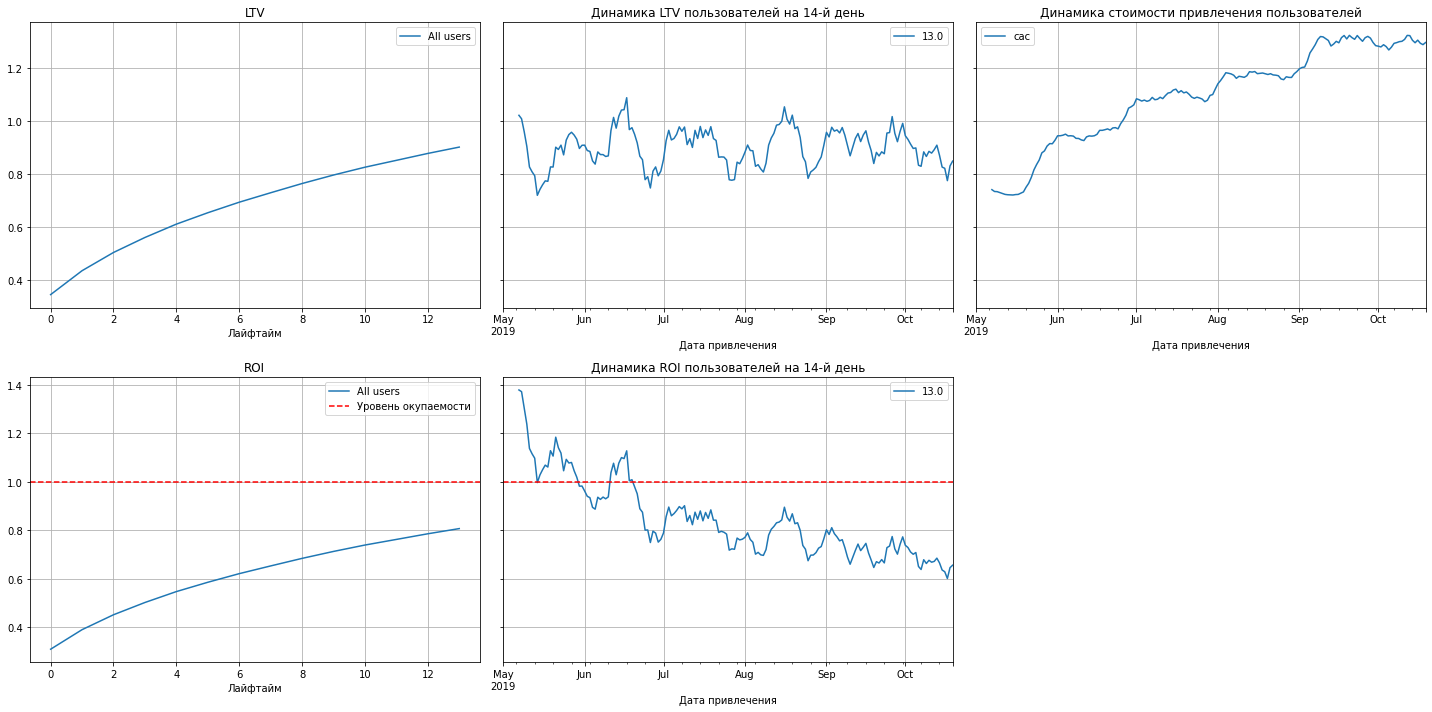

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:** 
1) Реклама не окупается. К концу горизонта анализа значение ROI далеко до уровня окупаемости. <br>
2) Стоимость привлечения клиентов постоянно растет при относительно стабильном LTV, соответственно динамика ROI отрицательная, необходимо установить причины. <br>

Для определения причин роста САС рассмотрим эти метрики в разбивке по странам, каналам привлечения и устройствам. 

### Окупаемость рекламы по странам

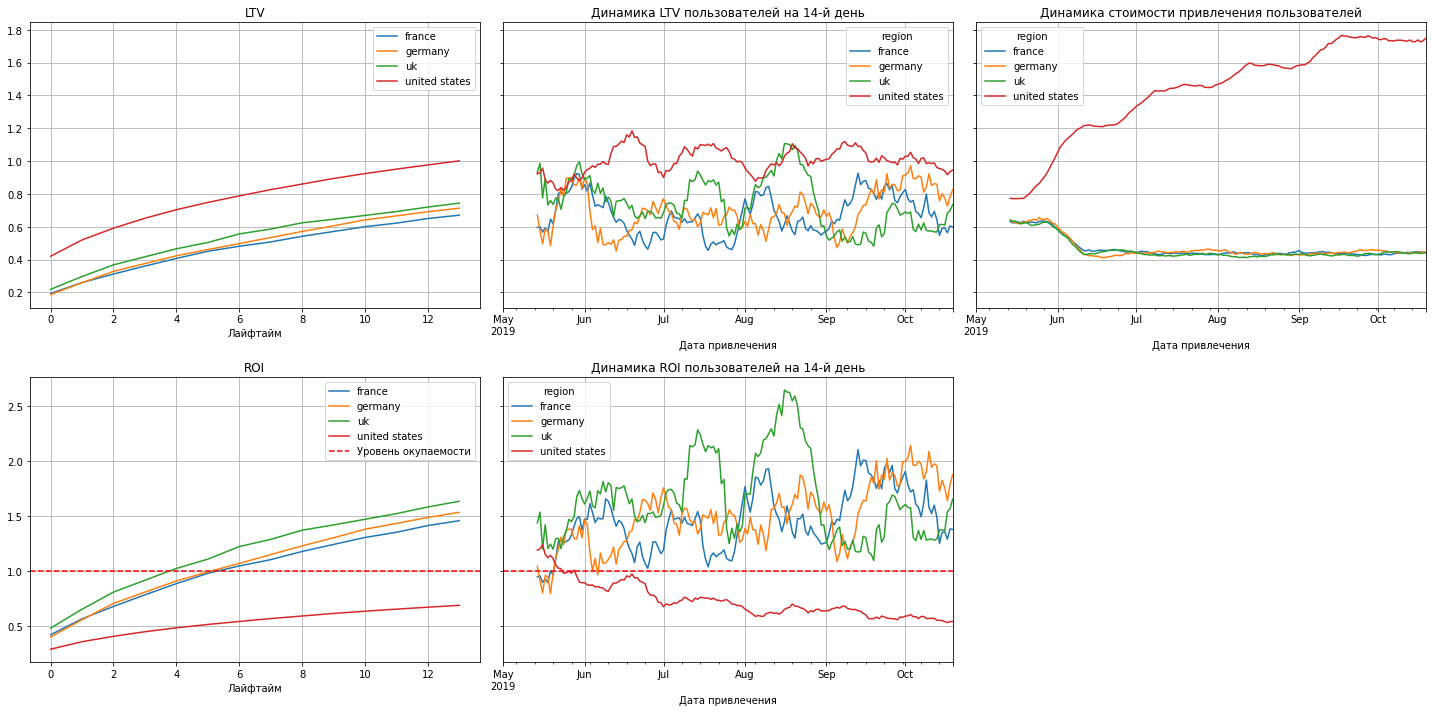

In [45]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:** Картину портит только одна страна - США. У других стран показатель CAC снизился в середине июля и остается относительно стабильным.
Реклама в США не дотягивает до уровня окупаемости к концу 14 дня, при этом видим резкий рост стоимости привлечения в этом регионе. Эти выводы противоречат первоначальному ожиданию, когда мы оценивали долю платящих пользователей, США было лидером.

### Окупаемость рекламы по каналам привлечения

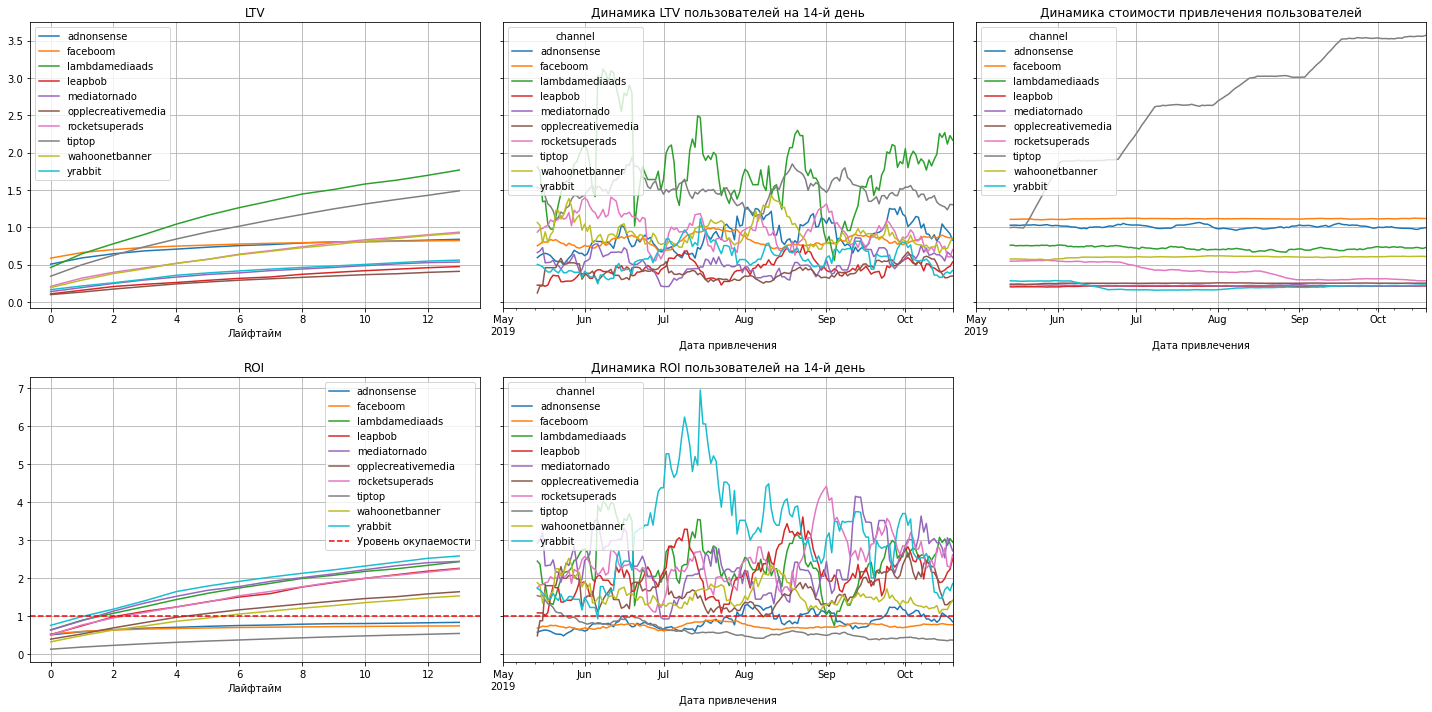

In [46]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** По каналу tiptop мы видим, что произошел резкий рост стоимости привлечения. По другим каналам этот  показатель стабилен. Также мы видим, что несколько рекламных источников не окупаются к 14 дню: tiptop, faceboom и adnonsense. По этим каналам нужно либо пересмотреть рекламную кампанию, либо отказаться от них.

###  Окупаемость рекламы устройствам

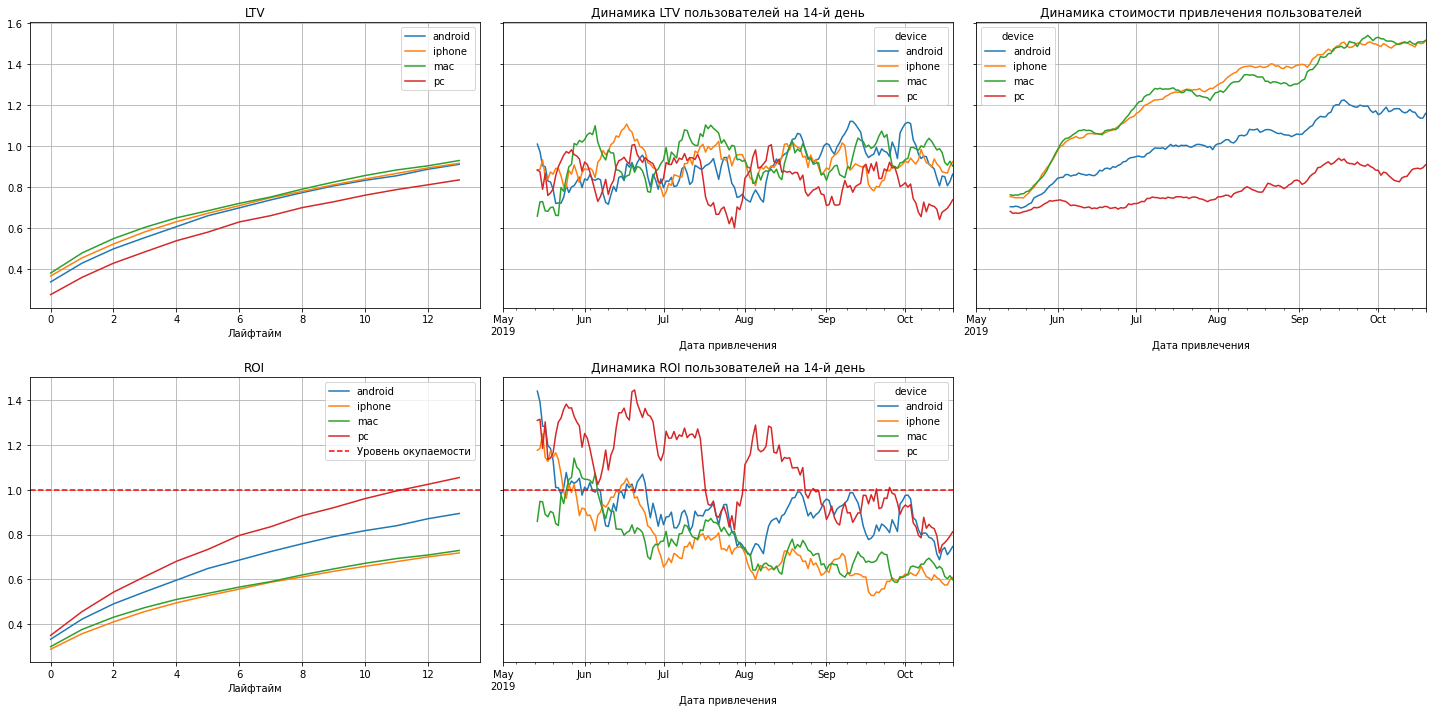

In [47]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** По всем устройствам видим рост стоимости привлечения пользователей. К 14 дню окупаются только пользователи, пользующиеся PC, а вот пользователи других устройств не оправдывают ожиданий. 

### Конверсия и удержание пользователей по странам

Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам. Для этого воспользуемся функцией.

In [48]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [49]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [50]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [51]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

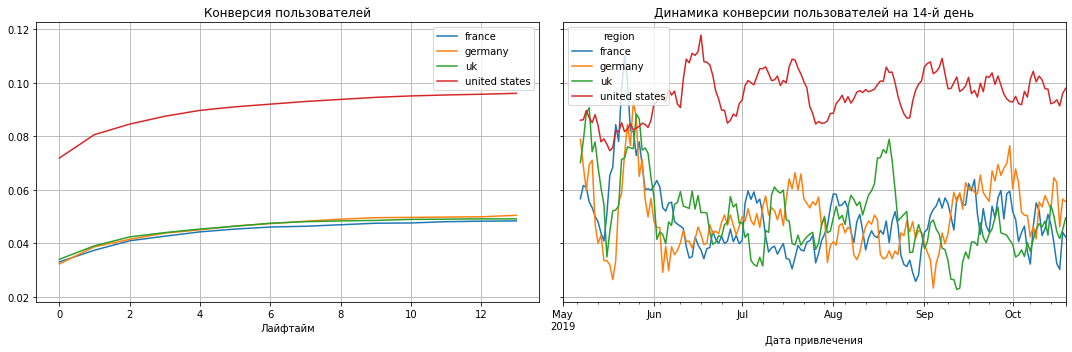

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Видим, что показатель конверсии для США почти в два раза выше, чем для остальных стран.

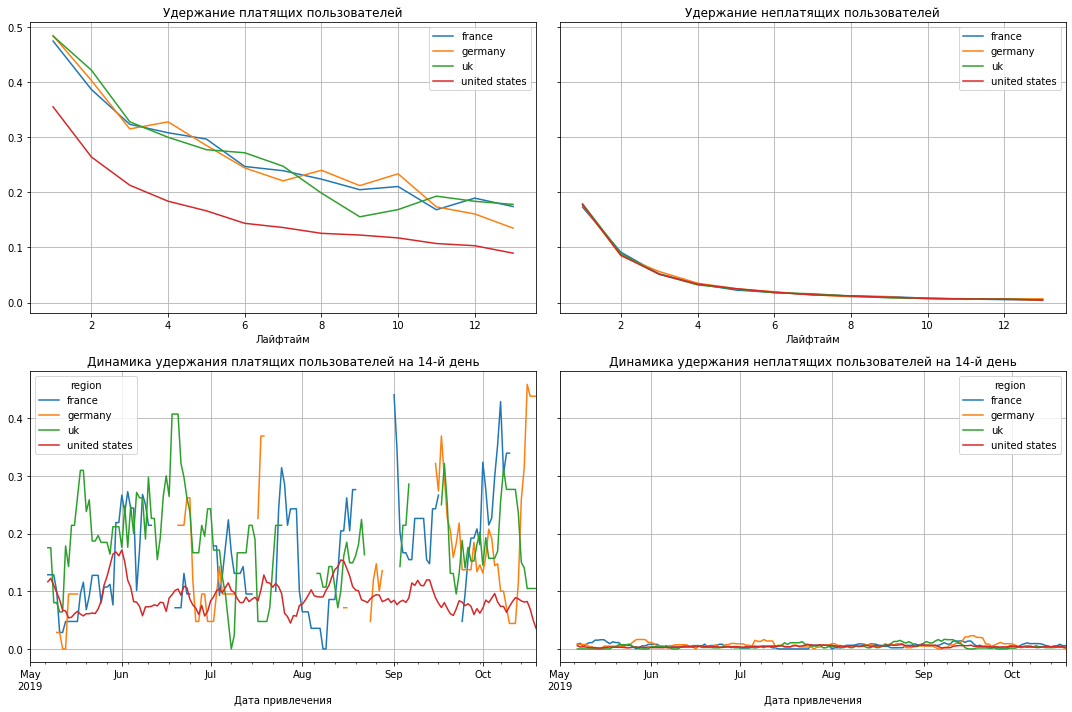

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Удержание неплатящих пользователей одинаково для всех стран, а вот удержание платящих пользователей США значительно хуже, чем в других регионах. Это странно, так как конверсия в покупателя в США самая высокая.

### Конверсия и удержание пользователей по каналам привлечения

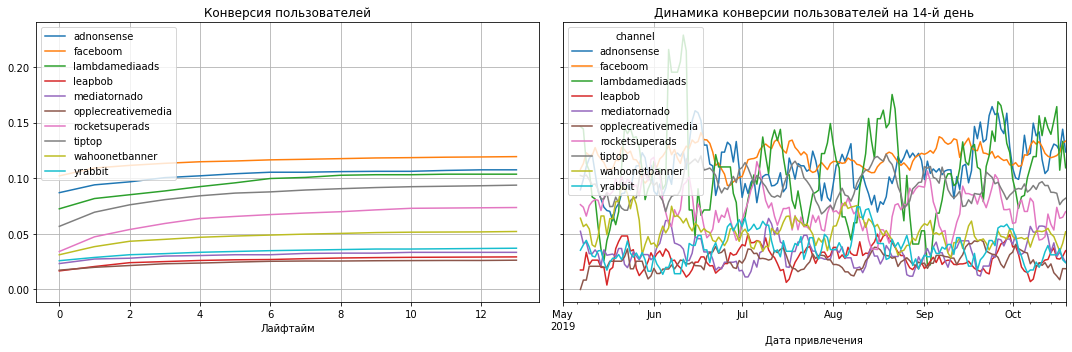

In [54]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Показатели конверсии достаточно стабильны для всех источников привлечения клиентов, однако есть как явные лидеры по этому показателю - faceboom, adnonsense, lambdamediasads, так и явные аутсайдеры - opplecreativemedia, leapbob, mediatornado. Органический трафик в расчет не берем, затрат на него в любом случае нет.

Изучим показатель удержания по каналам привлечения.

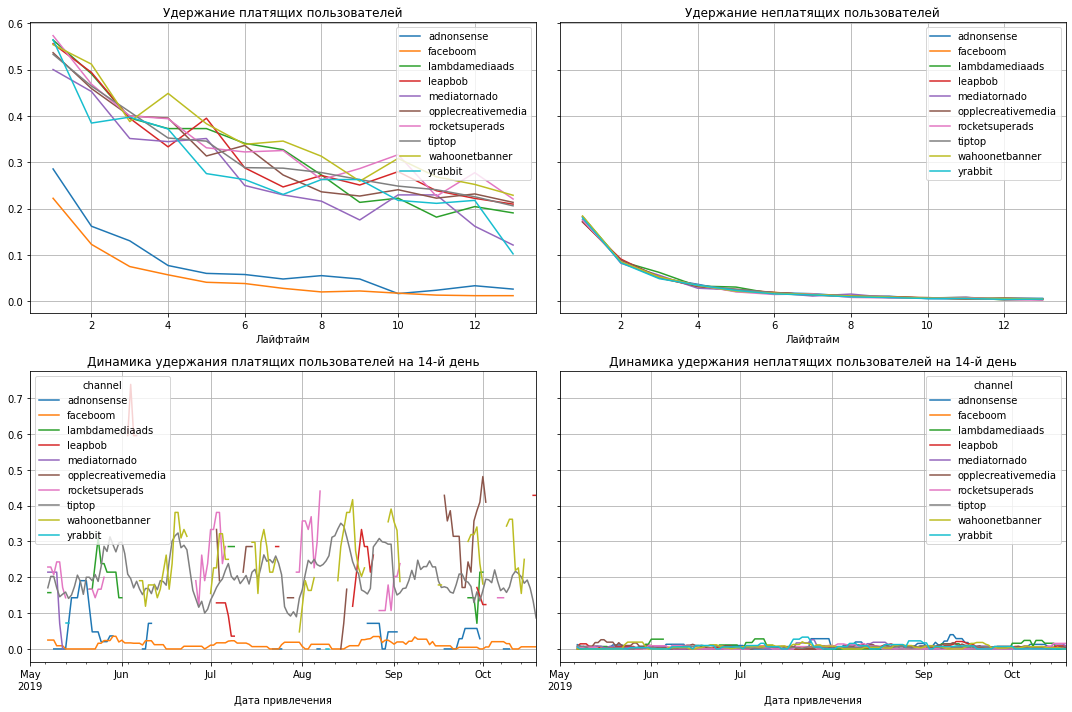

In [55]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Снова видим странную картину. Показатели конверсии для adnonsense и faceboom были в числе лидеров, а показатели удержания наоборот самые низкие. При этом показатели для неплатящих пользователей для всех каналов привлечения примерно одинаковы.

### Конверсия и удержание пользователей по устройствам

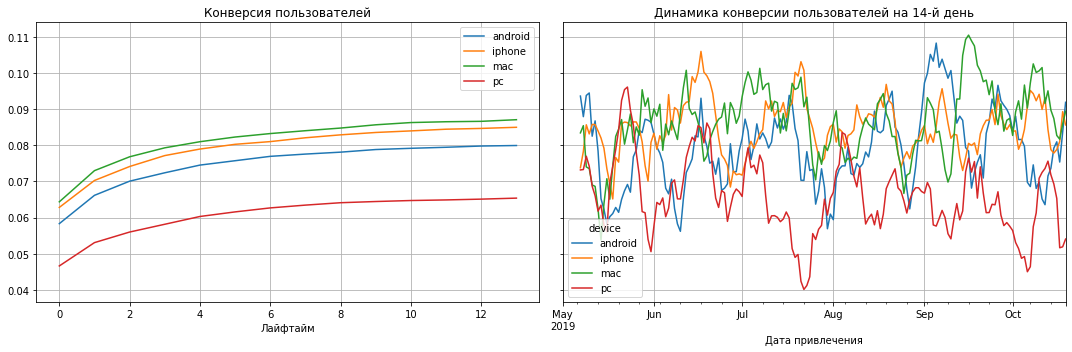

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Показатели конверсии для PC хуже, чем по другим устройствам, но это ожидаемо.

Изучим показатели удержания.

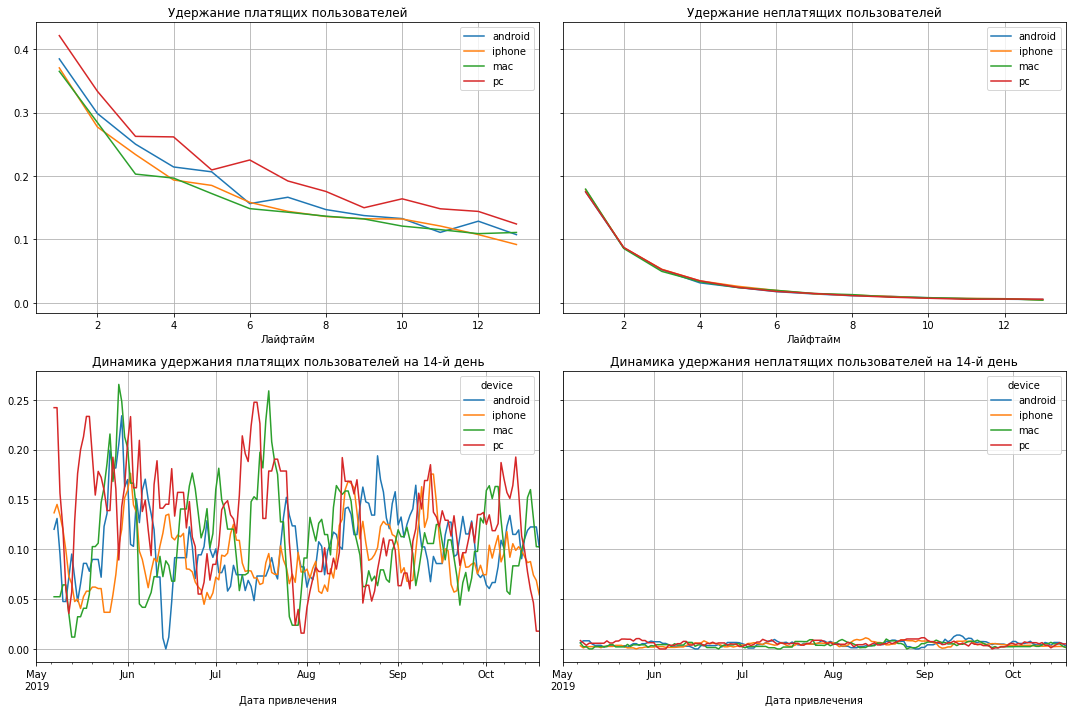

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Каких-либо видимых проблем с устройствами не обнаружено.

Итак, мы видим, что при хорошей конверсии, пользователи США имеют низкие показатели удержания и окупаемости рекламы.
Также следует отдельно изучить рост расходов на канал tiptop. Может эти показатели как-то связаны.

Самое время посмотреть, какие каналы привлечения используются в разбивке по регионам. Для этого построим сводную таблицу.

In [58]:
profiles.pivot_table(index='region', columns='channel', values='user_id', aggfunc='count').fillna(0)

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
region,,,,,,,,,,
france,1366.0,0.0,742.0,2988.0,0.0,2991.0,0.0,0.0,2971.0,0.0
germany,1219.0,0.0,649.0,2519.0,0.0,2562.0,0.0,0.0,2579.0,0.0
uk,1295.0,0.0,758.0,3046.0,0.0,3052.0,0.0,0.0,3003.0,0.0
united states,0.0,29144.0,0.0,0.0,4364.0,0.0,4448.0,19561.0,0.0,4312.0


Faceboom и tiptop используются только в США и как раз по ним больше всего вопросов.

По всей видимости, в этом и есть причина. Рост стоимости рекламы по каналу tiptop при его неэффективности и проблемы с удержанием пользователей по каналу faceboom привели к тому, что рекламная кампания в целом не окупается. Построим еще раз графики удержания ltv и конверсии без учета этих каналов.

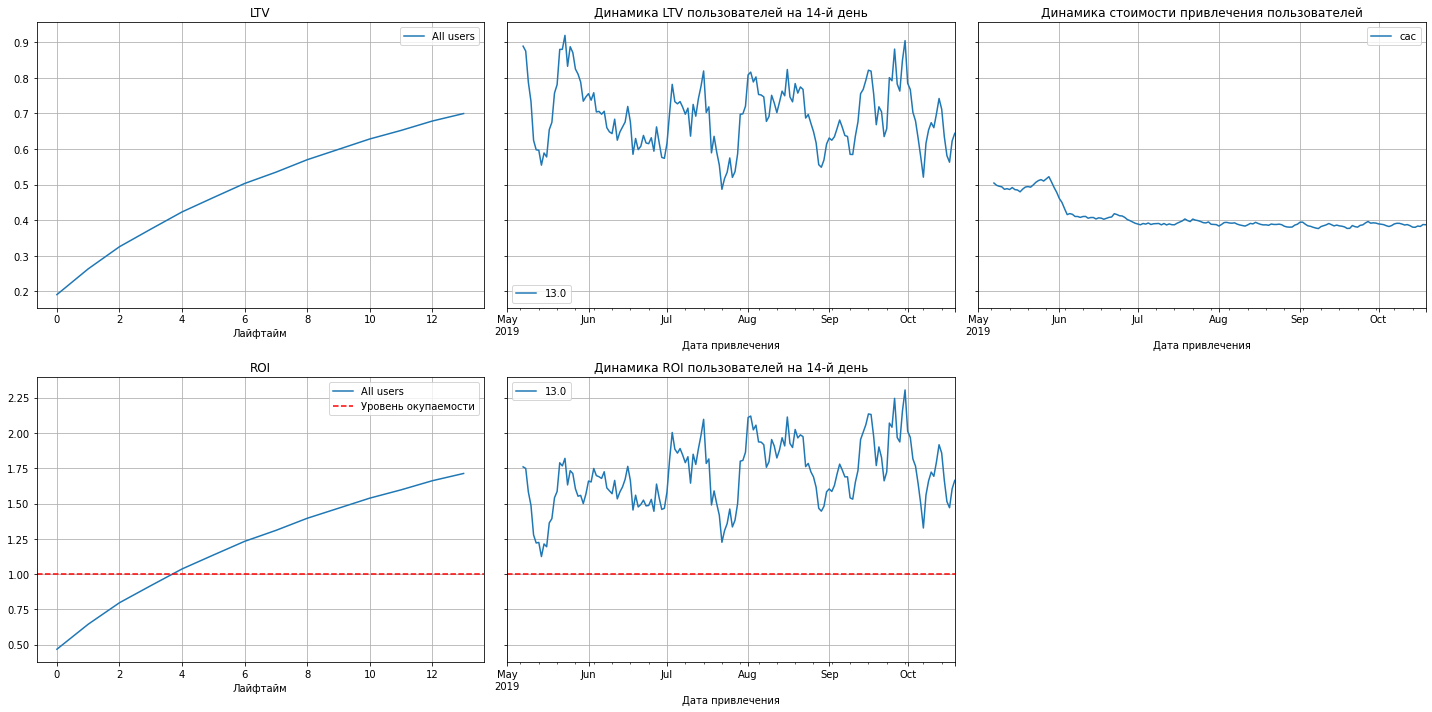

In [59]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "tiptop" and channel != "faceboom"' ) , orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Показатели сразу стали гораздо лучше. Реклама окупается уже на четвертый день, стоимость привлечения стабильна, ltv тоже стабилен.
Однако помним, что есть проблема с удержанием пользователей, привелеченных по adnonsense. Попробуем исключить и его.

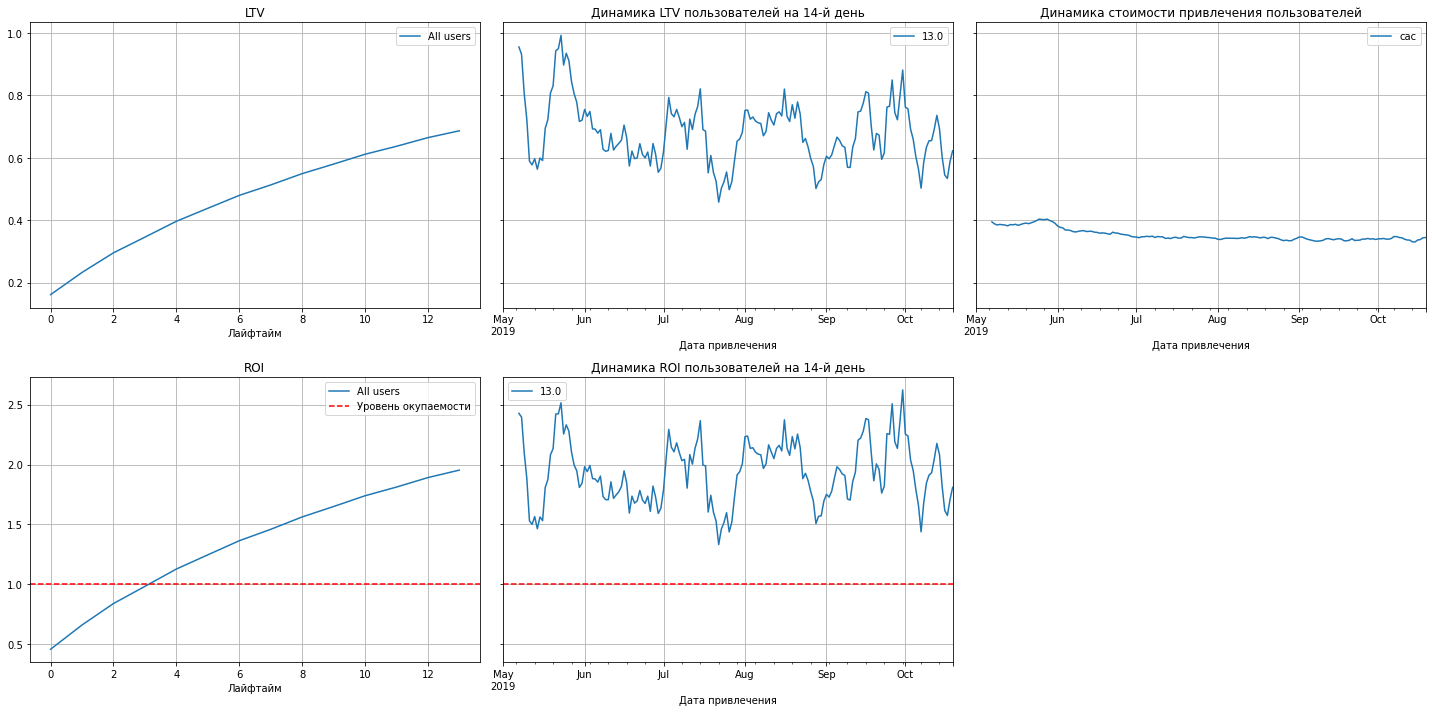

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "tiptop" and channel != "faceboom" and channel != "adnonsense"' ) , orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

##  Выводы
В ходе исследования выяснилось, что наибольшая доля бюджета рекламной кампании тратилась на каналы привлечения пользователей в США -  tiptop 54751.30 (51%) и faceboom (31%). При этом по данным каналам есть серьезные проблемы. Стоимость привлечения по каналу tiptop за последние полгода выросла более чем в 6 раз, при этом конверсия по нему средняя. Рекомендация - пересмотреть рекламную кампанию по этому каналу или отказаться от него вовсе и увеличить бюджет на другие источники, которые имеют хорошие показатели, например, mediatornado и yrabbit.
Канал faceboom имеет отличные показатели конверсии, но при этом у него проблемы и удержанием пользователей. Необходимо проверить, нет ли технических проблем с повторной оплатой у пользователей, либо доработать канал, например, предложить бонусы за повторную покупку. Отказываться совсем от этого канала не стоит, так как в США это ключевой источник трафика.

В других регионах ситуация хорошая по всем каналам, кроме adnonsense. Он также имеет хорошую конверсию, но у него низкие показатели по удержанию пользователей. Рекомендации такие же, как и для канала faceboom в США.

При исправлении рекламной кампании по вышеперечисленным каналам, окупаемость рекламы может наступать уже 3-4 день. 